# W4 Lab Assignment

This lab is more about experimenting instead of coding. We will cover Stevens’ power-law and matplotlib's colormaps.

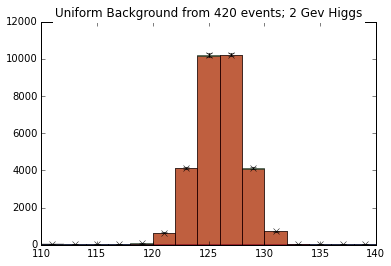

In [13]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
plt.show()
# increased by a factor of 10
Base = 110 + 30* np.random.rand(420)
# Base is set of observations with an expected 2800 background events per bin
# Note we assume here flat but in class I used a "sloping" curve that represented experiment better
# decreased by a factor of 10
gauss = 2 * np.random.randn(30000) + 126
# Gauss is Number of Higgs particles
simpletotal = np.concatenate((Base, gauss))
# simpletotal is Higgs+Background
plt.figure("Total Wide Higgs Bin 2 GeV")
values, binedges, junk = plt.hist(simpletotal, bins=15, range =(110,140), alpha = 0.5, color="green")
centers = 0.5*(binedges[1:] + binedges[:-1])
# centers is center of each bin
# values is number of events in each bin
# :-1 is same as :Largest Index-1
# binedges[:-1] gets you lower limit of bin
# 1: gives you array starts at second index (labelled 1 as first index 0)
# binedges[1:] is upper limit of each bin
# Note binedges has Number of Bins + 1 entries; centers has Number of Bins entries
errors =np.sqrt(values)
# errors is expected error for each bin
plt.hist(Base, bins=15, range =(110,140), alpha = 0.5, color="blue")
plt.hist(gauss, bins=15, range =(110,140), alpha = 0.5, color="red")
plt.errorbar(centers, values, yerr = errors, ls='None', marker ='x', color = 'black', markersize= 6.0 )
plt.title("Uniform Background from 420 events; 2 Gev Higgs", backgroundcolor = "white")
 

First, import libraries and use the `matplotlib inline` magic command:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

# Stevens’ power-law and your own psychophysics experiment!

Let's generate two numbers and represent them in lengths and areas respectively. As we only care about their ratio, we set one number to 0.01 and the other one 0.01\*ratio, where the ratio is generated randomly from the interval \[2,10\]. The [**`random`**](https://docs.python.org/2/library/random.html) module in Python provides various random number generators, and we can use the [**`random.uniform(a,b)`**](https://docs.python.org/2/library/random.html#random.uniform) function to get a float in [a,b].

In [2]:
import random
import time

n1 = 0.01
length_perceived = []
length_actual = []

Let's then plot them with a horizontal bar chart using the [**`pyplot.barh()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh) function.

([<matplotlib.axis.YTick at 0x10e0db790>,
 <a list of 3 Text yticklabel objects>)

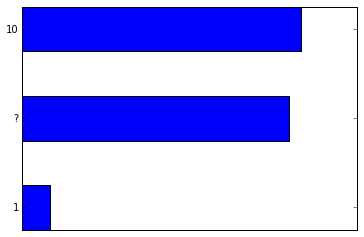

In [3]:
n2 = n1 * random.uniform(1,10)

plt.barh(np.arange(3), [n1, n2, 0.1], height=0.5)
plt.gca().set_frame_on(True)
plt.gca().get_xaxis().set_visible(False)
plt.yticks(np.arange(3)+0.25, ('1', '?', '10'))

In [4]:
length_perceived.append(3) # put the ratio that you perceived and run this cell (shift + enter). 

length_actual.append(n2/n1)
print('{:.2f}'.format(n2/n1))

9.56


Now we can draw the scatter plot of perceived and actual length.

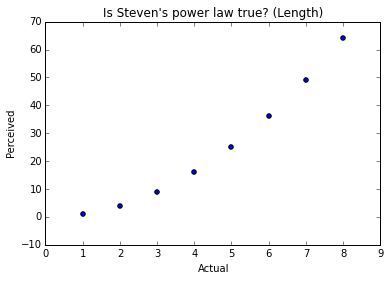

In [5]:
length_actual = [1,2,3,4,5,6,7,8]
length_perceived = [1,4,9,16,25,36,49,64]
plt.scatter(length_actual, length_perceived)
plt.title("Is Steven's power law true? (Length)")
plt.xlabel("Actual")
plt.ylabel("Perceived")

After plotting, let's fit it using a polynomial function. We can easily do it using Scipy's [**`curve_fit()`**](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function.

In [6]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.power(x, b) + c

popt, pcov = curve_fit(func, length_actual, length_perceived)
print('{:.2f} x^{:.2f} + {:.2f}'.format(*popt))

1.00 x^2.00 + 0.00


Now, we represent the two numbers as circles. We can calculate the radius given its area and then plot using the **`Circle()`** function.

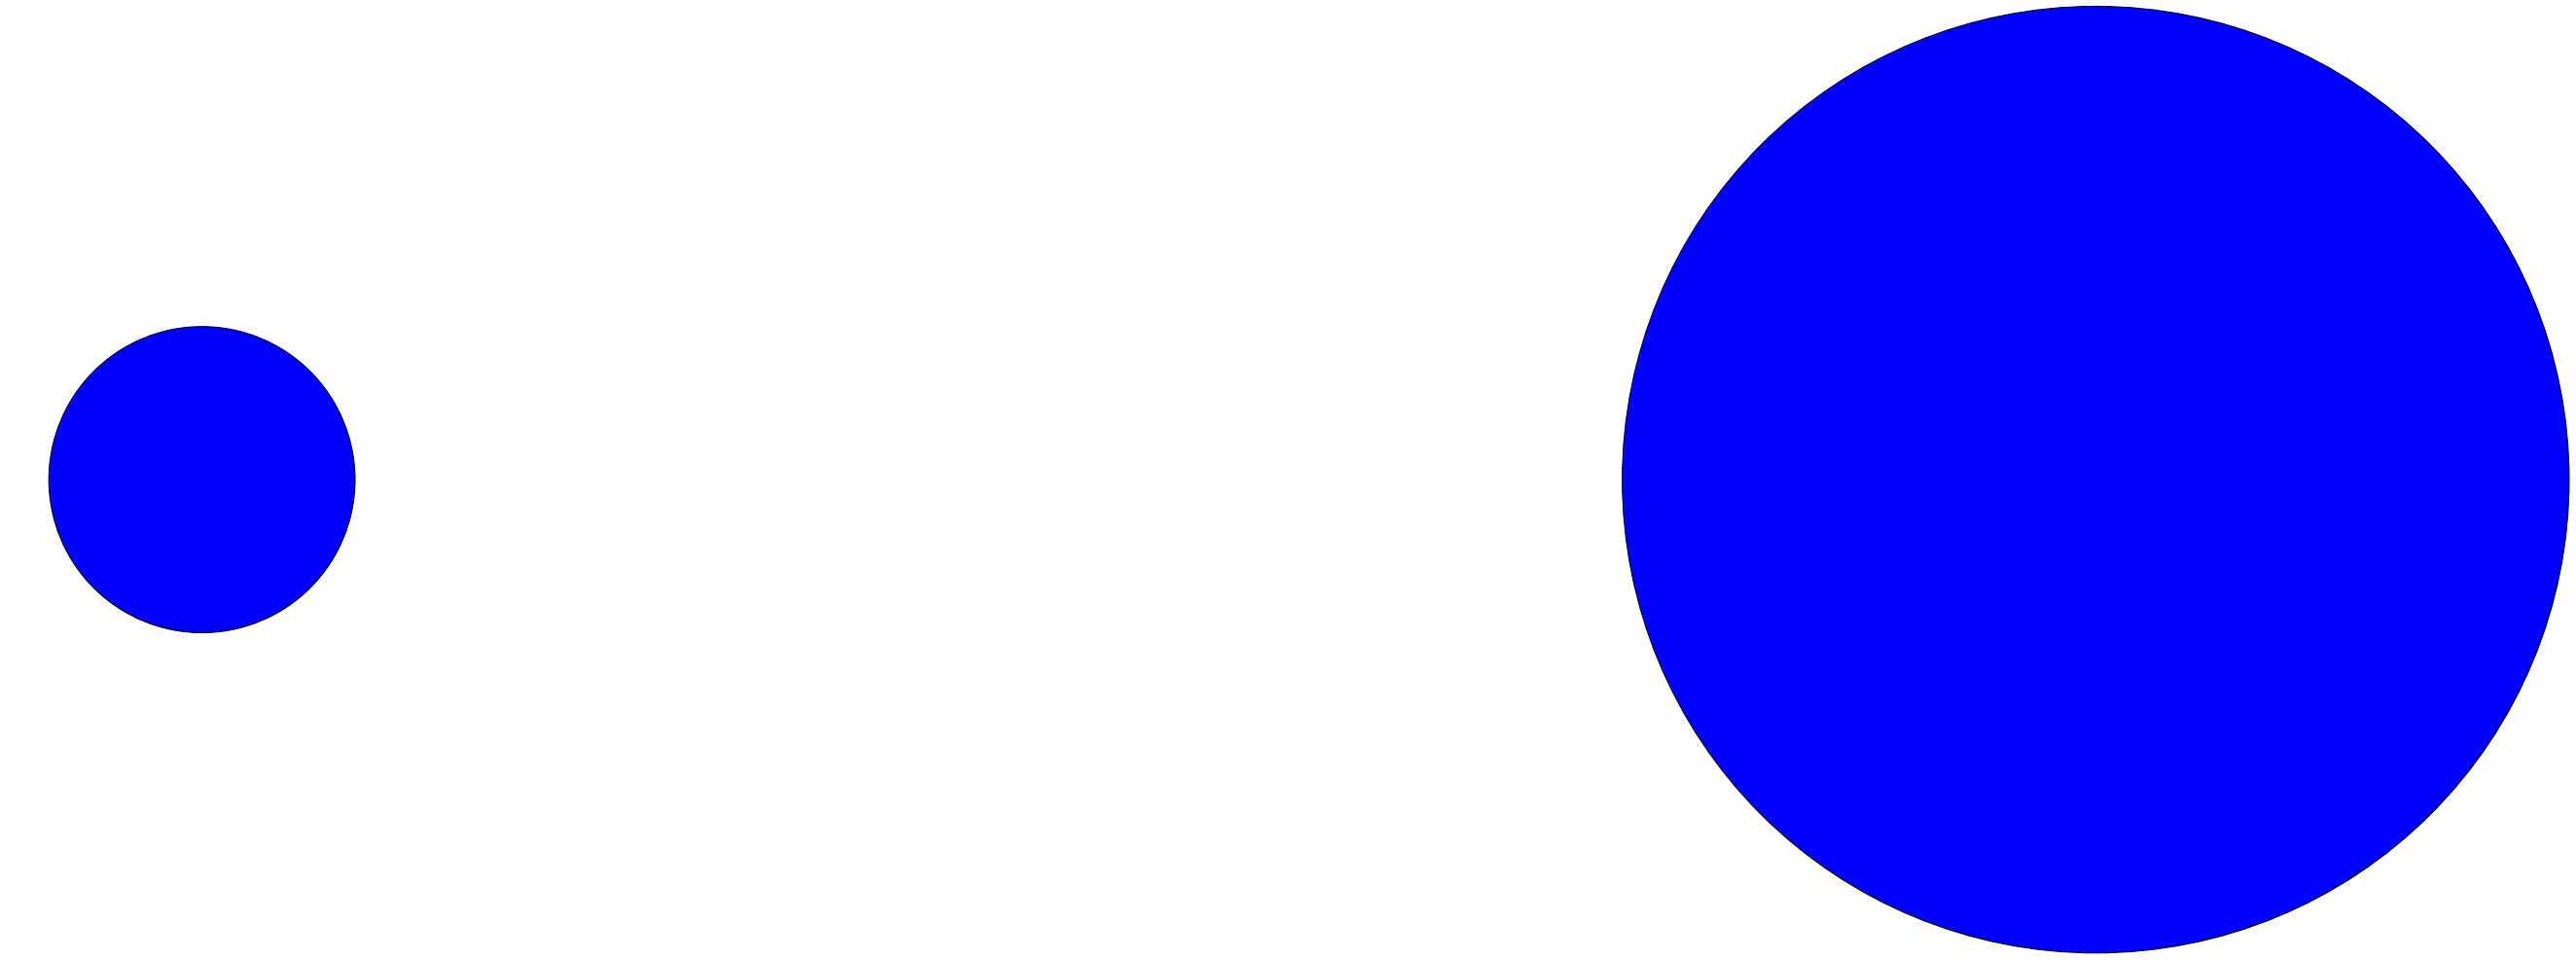

In [7]:
import math

radius1 = math.sqrt(n1/math.pi) # area = pi * r * r
radius2 = math.sqrt(n2/math.pi)

plt.axis('equal')
plt.axis('off')
circ1 = plt.Circle( (0,0),         radius1, clip_on=False )
circ2 = plt.Circle( (4*radius2,0), radius2, clip_on=False )
plt.gca().add_artist(circ1)
plt.gca().add_artist(circ2)

How about the ratio between the areas of the two circles? Write down your answer [**here**]

Let's reveal the correct answer.

In [8]:
print(n2/n1)

9.55925692931


# Colormaps

Let's plot a sine and cosine wave respectively with red and green color.

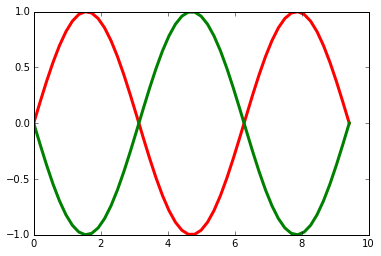

In [9]:
x = np.linspace(0, 3*np.pi)
plt.plot(x, np.sin(x), color='r', lw=3)
plt.plot(x, np.sin(x-np.pi), color='g', lw=3)

We can also use different color schemes in matplotlib. Here you can find them

http://matplotlib.org/users/colormaps.html

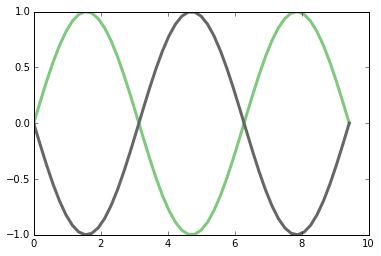

In [10]:
plt.plot(x, np.sin(x), color=plt.cm.Accent(0), lw=3)
plt.plot(x, np.sin(x-np.pi), color=plt.cm.Accent(1.0), lw=3)

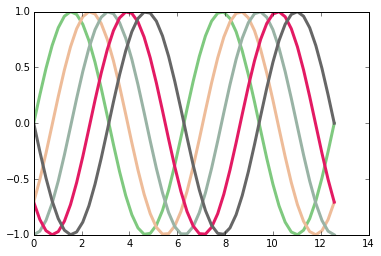

In [11]:
num_lines = 5
x = np.linspace(0, 4*np.pi)
shift = np.linspace(0, np.pi, num_lines)
color_idx = np.linspace(0, 1, num_lines)
for i in range(len(color_idx)):
    plt.plot(x, np.sin(x - shift[i]), color=plt.cm.Accent(color_idx[i]), lw=3)

Try different color schemes by changing the `color=plt.cm.Accent(color_idx[i]), lw=3)` with different scheme names.

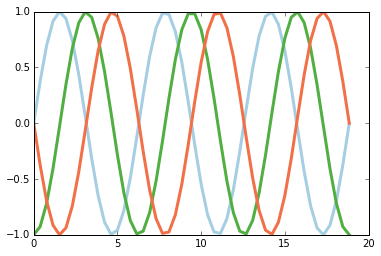

In [98]:
num_lines = 3
x = np.linspace(0, 6*np.pi)
shift = np.linspace(0, np.pi, num_lines)
color_idx = np.linspace(0, 0.5, num_lines)
for i in range(len(color_idx)):
    plt.plot(x, np.sin(x - shift[i]), color=plt.cm.Paired(color_idx[i]), lw=3)

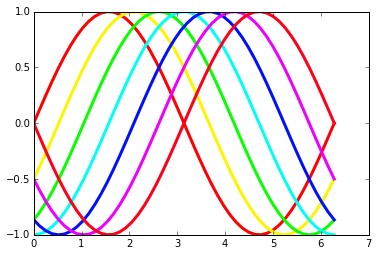

In [99]:
num_lines = 7
x = np.linspace(0, 2*np.pi)
shift = np.linspace(0, np.pi, num_lines)
color_idx = np.linspace(0, 1, num_lines)
for i in range(len(color_idx)):
    plt.plot(x, np.sin(x - shift[i]), color=plt.cm.hsv(color_idx[i]), lw=3)

# Colormap and images

http://matplotlib.org/users/image_tutorial.html

We can also display an image using Colormaps.

In [25]:
import colormaps as cmaps
import matplotlib.image as mpimg

In [34]:
img = mpimg.imread('fish.png')
lum_img = np.flipud(img[:,:,0])

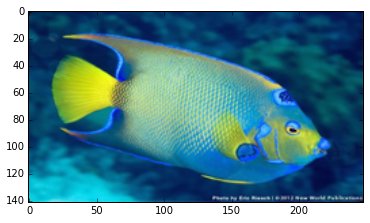

In [43]:
plt.imshow(img)

In [41]:
img[1]

array([[ 0.01176471,  0.14901961,  0.33725491,  1.        ],
       [ 0.01176471,  0.14901961,  0.33725491,  1.        ],
       [ 0.01176471,  0.15294118,  0.34117648,  1.        ],
       [ 0.01568628,  0.16078432,  0.34509805,  1.        ],
       [ 0.01568628,  0.15294118,  0.32941177,  1.        ],
       [ 0.01568628,  0.15294118,  0.32941177,  1.        ],
       [ 0.01176471,  0.15686275,  0.32941177,  1.        ],
       [ 0.01568628,  0.16862746,  0.34117648,  1.        ],
       [ 0.01568628,  0.17254902,  0.34117648,  1.        ],
       [ 0.01568628,  0.17254902,  0.34117648,  1.        ],
       [ 0.01176471,  0.17647059,  0.34117648,  1.        ],
       [ 0.01176471,  0.17647059,  0.34117648,  1.        ],
       [ 0.01176471,  0.17647059,  0.34117648,  1.        ],
       [ 0.01176471,  0.17647059,  0.34117648,  1.        ],
       [ 0.01176471,  0.17647059,  0.34117648,  1.        ],
       [ 0.01176471,  0.17647059,  0.34117648,  1.        ],
       [ 0.01568628,  0.

In [37]:
img[0][0]

array([ 0.07058824,  0.19215687,  0.3764706 ,  1.        ], dtype=float32)

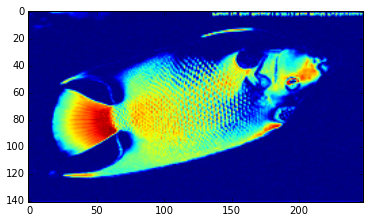

In [45]:
plt.imshow(np.flipud(img[:,:,0]))

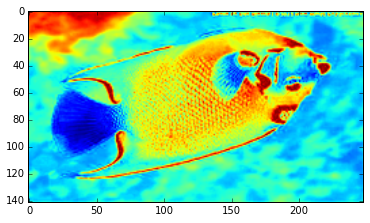

In [52]:
plt.imshow(np.flipud(img[:,:,2]))

<matplotlib.colorbar.Colorbar instance at 0x1122a1fc8>

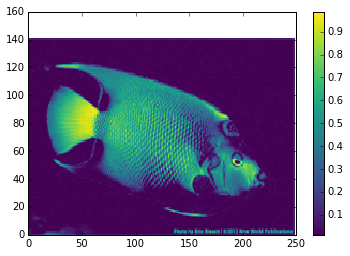

In [39]:
plt.pcolormesh(lum_img, cmap=cmaps.viridis)
plt.colorbar()

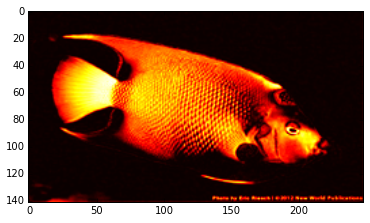

In [78]:
lum_img = img[:,:,0]
imgplt = plt.imshow(lum_img)
imgplt.set_cmap('hot')

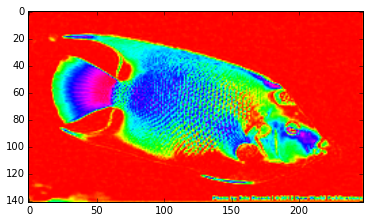

In [77]:
lum_img = img[:,:,0]
imgplt = plt.imshow(lum_img)
imgplt.set_cmap('hsv')

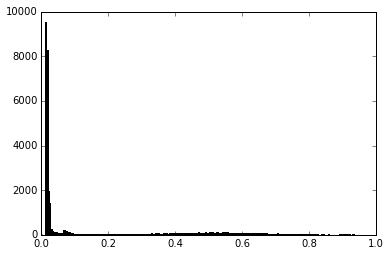

In [82]:
plt.hist(lum_img.flatten(), 256, range=(0.0,1.0), fc='k', ec='k')
imgplt.set_clim(0.0,0.7)

"Most often, the “interesting” part of the image is around the peak" says the material! 

From http://matplotlib.org/examples/pylab_examples/pcolor_demo.html

<matplotlib.colorbar.Colorbar instance at 0x1171bec20>

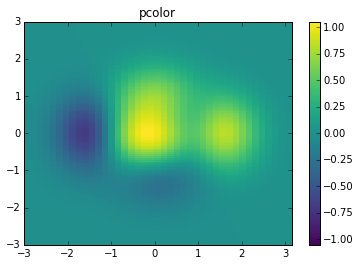

In [83]:
dx, dy = 0.15, 0.05
y, x = np.mgrid[slice(-3, 3 + dy, dy),
                slice(-3, 3 + dx, dx)]
z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

plt.pcolor(x, y, z, cmap=cmaps.viridis, vmin=z_min, vmax=z_max)
plt.title('pcolor')
# set the limits of the plot to the limits of the data
plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()


Demonstrates similarities between pcolor, pcolormesh, imshow and pcolorfast
for drawing quadrilateral grids.

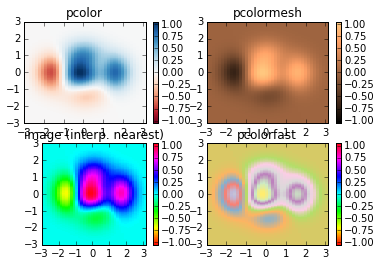

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# make these smaller to increase the resolution
dx, dy = 0.15, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(-3, 3 + dy, dy),
                slice(-3, 3 + dx, dx)]
z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()



plt.subplot(2, 2, 1)
plt.pcolor(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
plt.title('pcolor')
# set the limits of the plot to the limits of the data
plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()



plt.subplot(2, 2, 2)
plt.pcolormesh(x, y, z, cmap='copper', vmin=z_min, vmax=z_max)
plt.title('pcolormesh')
# set the limits of the plot to the limits of the data
plt.axis([x.min(), x.max(), y.min(), y.max()])
plt.colorbar()



plt.subplot(2, 2, 3)
plt.imshow(z, cmap='hsv', vmin=z_min, vmax=z_max,
           extent=[x.min(), x.max(), y.min(), y.max()],
           interpolation='nearest', origin='lower')
plt.title('image (interp. nearest)')
plt.colorbar()



ax = plt.subplot(2, 2, 4)
ax.pcolorfast(x, y, z, cmap='Set3', vmin=z_min, vmax=z_max)
plt.title('pcolorfast')
plt.colorbar()



plt.show()

In [95]:
y, x = np.mgrid[slice(-3, 3 + dy, dy),
                slice(-3, 3 + dx, dx)]



In [96]:
y

array([[-3.  , -3.  , -3.  , ..., -3.  , -3.  , -3.  ],
       [-2.95, -2.95, -2.95, ..., -2.95, -2.95, -2.95],
       [-2.9 , -2.9 , -2.9 , ..., -2.9 , -2.9 , -2.9 ],
       ..., 
       [ 2.9 ,  2.9 ,  2.9 , ...,  2.9 ,  2.9 ,  2.9 ],
       [ 2.95,  2.95,  2.95, ...,  2.95,  2.95,  2.95],
       [ 3.  ,  3.  ,  3.  , ...,  3.  ,  3.  ,  3.  ]])

In [97]:
x

array([[-3.  , -2.85, -2.7 , ...,  2.85,  3.  ,  3.15],
       [-3.  , -2.85, -2.7 , ...,  2.85,  3.  ,  3.15],
       [-3.  , -2.85, -2.7 , ...,  2.85,  3.  ,  3.15],
       ..., 
       [-3.  , -2.85, -2.7 , ...,  2.85,  3.  ,  3.15],
       [-3.  , -2.85, -2.7 , ...,  2.85,  3.  ,  3.15],
       [-3.  , -2.85, -2.7 , ...,  2.85,  3.  ,  3.15]])